# Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('train.csv')

# Data Exploration

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [11]:
#not too bad still have to clean those up.

# Pre-processing

In [13]:
#I wanna get rid of columns that are unnecessary. 

In [14]:
df = df.drop(['LotFrontage',
       'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'Alley'], axis=1)

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,0,12,2008,WD,Normal,250000


In [16]:
#idk some visualizations just cuz

In [17]:
df = pd.get_dummies(df, drop_first=True)

<Axes: xlabel='YrSold', ylabel='SalePrice'>

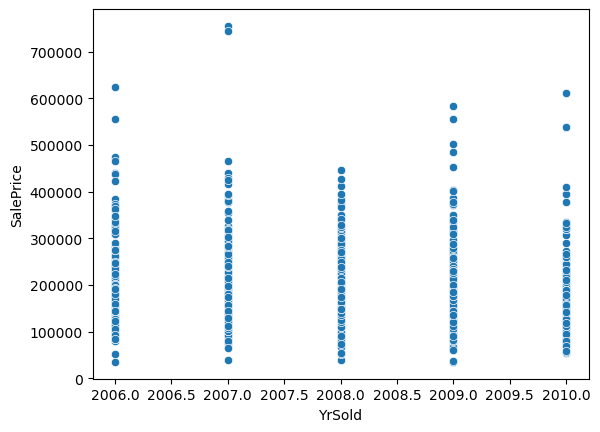

In [18]:
sns.scatterplot(x= "YrSold", y= "SalePrice", data=df)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

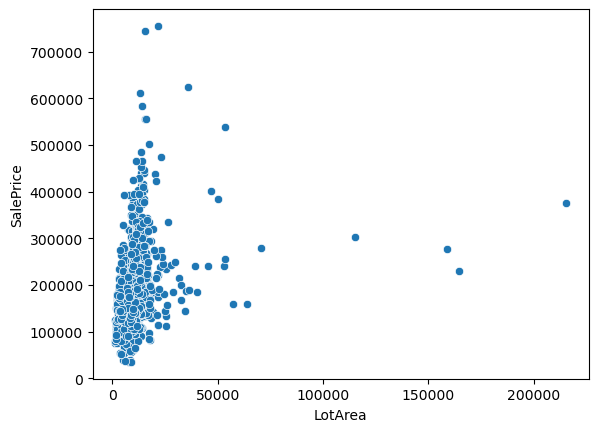

In [19]:
sns.scatterplot(x= "LotArea", y= "SalePrice", data=df)

In [20]:
X = df[['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageArea']]
y = df['SalePrice']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
print(y_pred)

[140075.20776204 301484.28930932 105738.78414887 168162.72106359
 292544.44349698  56337.13545562 211251.80696063 169518.88806674
  55875.78097994 137411.41948261 164995.31120661 111691.15683469
 109746.49360804 218220.48189887 195466.36030818 108876.87486386
 220834.77430335 117066.30173261 122218.01238223 216858.38366063
 165270.67070381 252594.05591006 191613.42239448 107818.94636595
 217351.76570893 172217.88119076 201775.30266373  94108.93120693
 192607.33635902 202033.84606679 119201.16010762 260926.79479339
 201307.89134276  85922.13675496 267522.7899074  151147.37875938
 149829.39452549 230177.9628131  302350.72161187 110505.45562402
 145905.54191527 237446.19879517 116090.28795993 315217.56429102
 129504.91451469 160059.92275556 110323.54113155 118361.62336367
 345887.62699284 141797.74329969 107262.99583926 194866.8392442
 132750.12663336 307651.07562145 151108.50310771 236207.22562056
 219105.82804086 145367.75093166 168838.45867008 107605.29099815
  49299.38211487 125188.95

Text(0.5, 1.0, 'Actual vs Predicted')

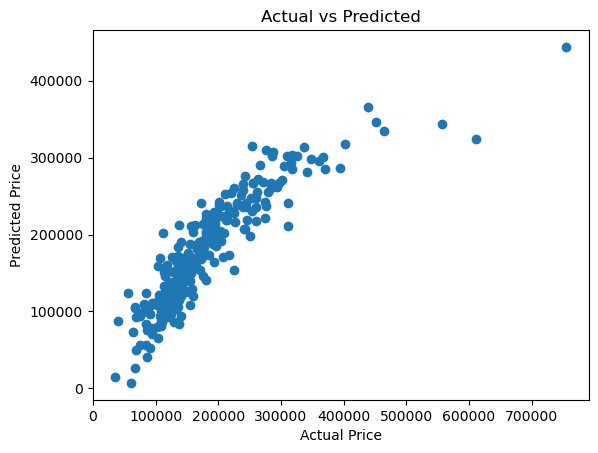

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 41490.04621789466


In [27]:
baseline_pred = [y_train.mean()] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 87619.03450611533


In [28]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [29]:
model.fit(X_train, y_train_log)

LinearRegression()

In [30]:
y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log)

In [31]:
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Current RMSE: {rmse_log}")

Current RMSE: 34180.23834284725


In [57]:
X = df[['YearBuilt', 'YrSold']]
y = df['SalePrice']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted')

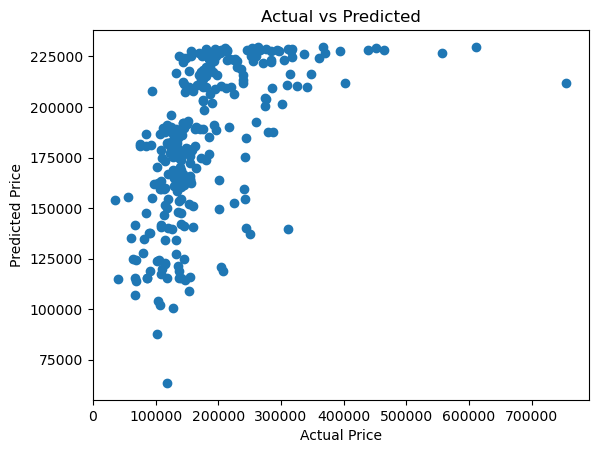

In [65]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')

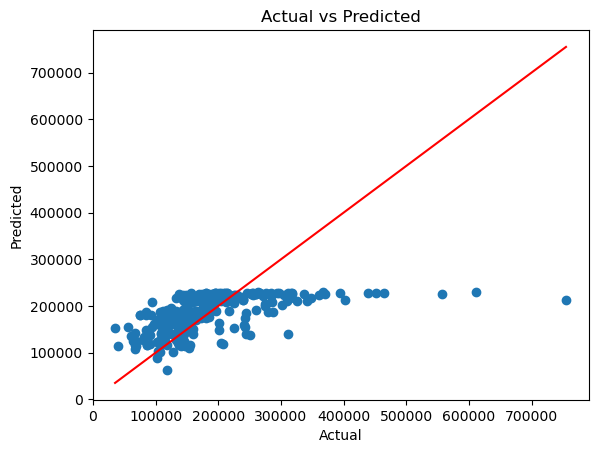

In [75]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [67]:
baseline_pred = [y_train.mean()] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 87619.03450611533


In [69]:
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Current RMSE: {rmse_log}")

Current RMSE: 73754.6044215045
